In [9]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt
from online_functions.create_ASM_batch import *

matplotlib.rcParams['figure.figsize'] = [13, 10]

# Create and import data

Choose a bunch to look at and make the images

In [10]:
# Choose which bunch to look at
bunch = 1000
# Create the dataset for that batch
create_ASM_batch(bunch, bunch+1000, "../data")

Loading classification data
Creating image files and training csv
.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100%
Training file and 1000 images created


Load in data

In [11]:
# training csv with image locations and transcriptions
data = pd.read_pickle("tf_output/online_data/online_metrics21000.pkl")
pred_data = data[data.pred == "pred"]

Get pertinent information from only prediction data

In [12]:
redata = pd.DataFrame(columns=["filename", "label", "word", "subject_id", "class_id", "frame", "line_num", "bunch"])
for i in range(len(pred_data)):
    curdat = pred_data.iloc[i]
    labels = [str(d, "utf-8") for d in curdat["labels"][0]]
    words = [str(d, "utf-8") for d in curdat["words"][0]]
    filenames = [str(d, "utf-8") for d in curdat["filenames"][0]]
    
    fns = [f.split("/")[-1].replace(".png", "") for f in filenames]
    ids = [[str(int(float(idd))) for idd in f.split("_")] for f in fns]
    subject_id = [f[0] for f in ids]
    class_id = [f[1] for f in ids]
    frame = [f[2] for f in ids]
    line_num = [f[3] for f in ids]
    bunch_num = [curdat["bunch"] for j in range(len(fns))]
    
    data_dict = {"filename":filenames, "label":labels, "word":words, 
                 "subject_id":subject_id, "class_id":class_id, "frame":frame,
                 "line_num":line_num, "bunch":bunch_num}
    newdata = pd.DataFrame.from_dict(data_dict, dtype="str")
    redata = redata.append(newdata)
    
    if i % 100 == 0: print(i, end="\t")

0	100	200	300	400	500	600	700	800	900	1000	1100	1200	1300	

Figure out which data has been seen before based on subject id

In [13]:
subj_set = set()
seen_before = []

for i in range(len(redata)):
    combo = redata.iloc[i]["subject_id"] + "_" + redata.iloc[i]["frame"]
    if combo in subj_set:
        seen_before.append(True)
    else:
        seen_before.append(False)
        subj_set.add(combo)

redata["unseen_subj"] = np.logical_not(seen_before)

Select only the new stuff

In [14]:
newstuff = redata[np.logical_and(redata.bunch == bunch, redata.unseen_subj)]

In [15]:
len(newstuff)

69

# Before training

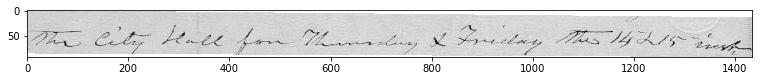

Prediction: hr city seall fon Theemredery & Irriclay the 14As8 irk
Label: the City Hall for Thursday & Friday the 14 & 15 inst.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887332_87129880_1_0.png
-----------------------------------------------------------------------------


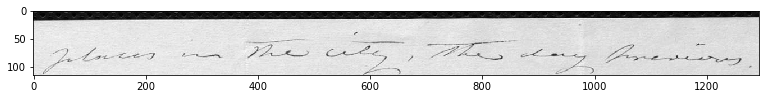

Prediction: plaes is he it he day previs.
Label: places in the city, the day previous.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887332_87129880_2_0.png
-----------------------------------------------------------------------------


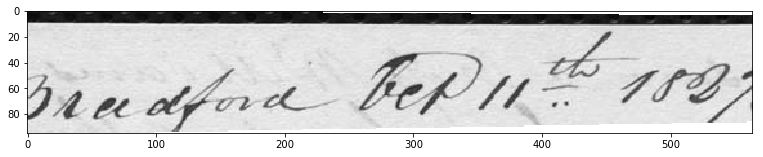

Prediction: Bradford bep1 th 153
Label: Bradford Feb 11th 1827
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887075_87129882_0_0.png
-----------------------------------------------------------------------------


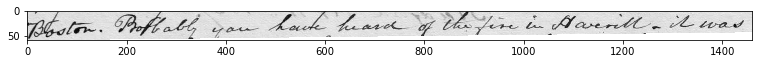

Prediction: Boton. Potabl you hack heard of the fire in Maverill - it was
Label: Boston.  Probably you have heard of the fire in Haverill? - it was
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887075_87129882_1_0.png
-----------------------------------------------------------------------------


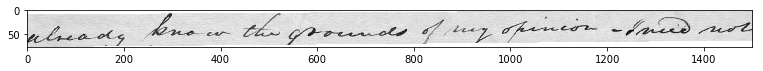

Prediction: already bno w the grounds of y spinion - Ineed not
Label: already know the grounds of my opinion - I need not
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887075_87129882_2_0.png
-----------------------------------------------------------------------------


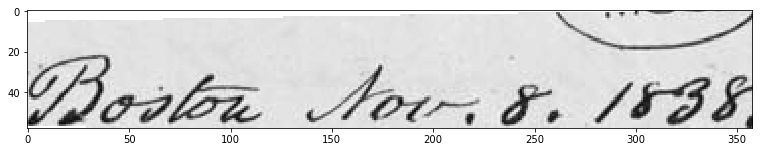

Prediction: Bostor Noss. 1o8s,
Label: Boston Nov. 8, 1838
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13885717_87130033_0_0.png
-----------------------------------------------------------------------------


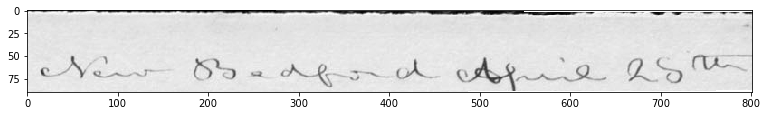

Prediction: tioh ogoecfi g io
Label: New Bedford April 28th
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13892417_87130120_0_0.png
-----------------------------------------------------------------------------


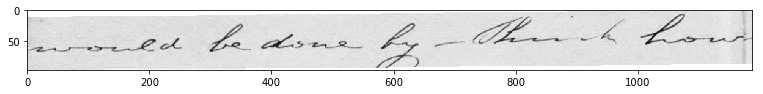

Prediction: would be done by - hanch how
Label: would be done by - Think how?
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13892417_87130120_1_0.png
-----------------------------------------------------------------------------


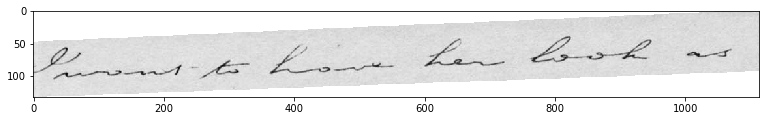

Prediction: Ins to hae her heak as
Label: I want to have her look as
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13892417_87130120_2_0.png
-----------------------------------------------------------------------------


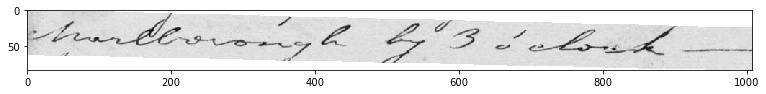

Prediction: harlorough by03 aloek
Label: Marlborough by 3 o'clock
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13892417_87130120_3_0.png
-----------------------------------------------------------------------------


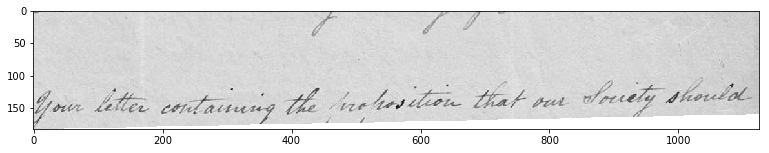

Prediction: Your leter cotaiing the neositon that on Soeiety shouid
Label: Your letter containing the proposition that our society should
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13886557_87130129_0_0.png
-----------------------------------------------------------------------------


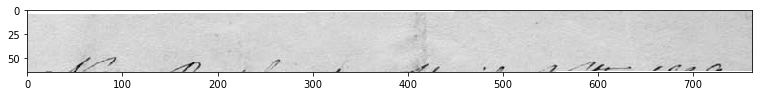

Prediction: 1&e su e
Label: New Bedford April 26th 1839
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891831_87130211_0_0.png
-----------------------------------------------------------------------------


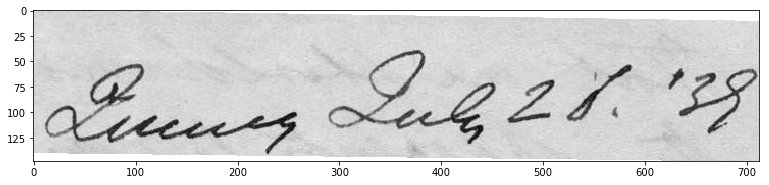

Prediction: Qewey Luls 2s.  28
Label: Queens July 28 '39
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13893283_87130346_0_0.png
-----------------------------------------------------------------------------


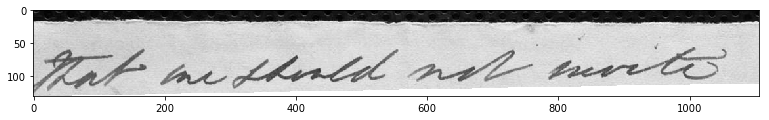

Prediction: Hr ne herld nol sevet
Label: that we should not invite
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13893283_87130346_1_0.png
-----------------------------------------------------------------------------


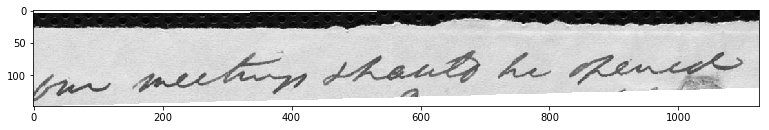

Prediction: oum meetps dhauld he openeed
Label: our meetings should be opened
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13893283_87130346_2_0.png
-----------------------------------------------------------------------------


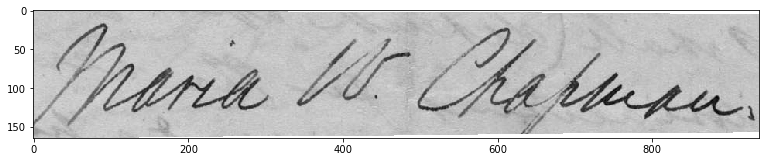

Prediction: Maria sor tpaprcken
Label: Maria W. Chapman
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13893283_87130346_3_0.png
-----------------------------------------------------------------------------


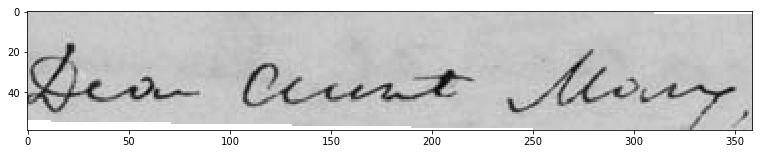

Prediction: Sear ceunt teawy.
Label: Dear Aunt Mary,
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887805_87130371_0_0.png
-----------------------------------------------------------------------------


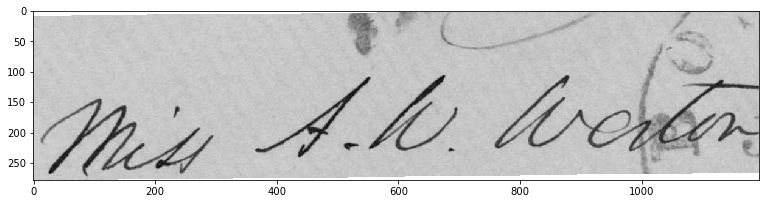

Prediction: W y ut
Label: Miss A. W. Werton
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13886062_87130390_0_0.png
-----------------------------------------------------------------------------


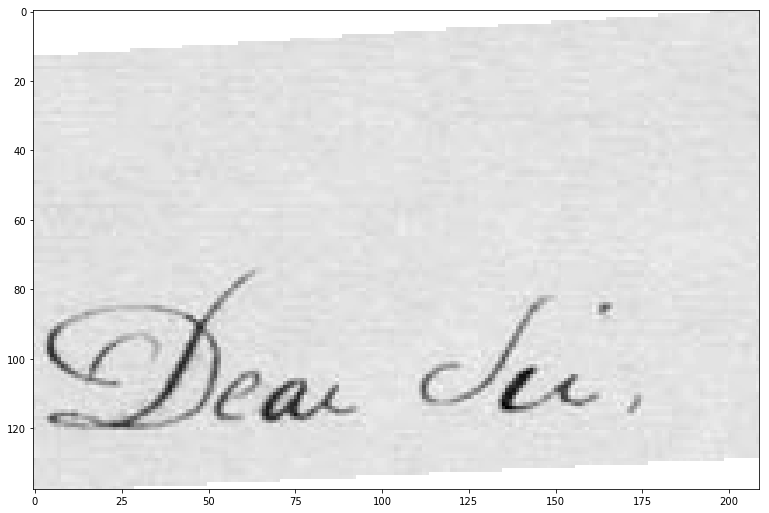

Prediction: Daudn
Label: Dear Sir,
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13888846_87130393_0_0.png
-----------------------------------------------------------------------------


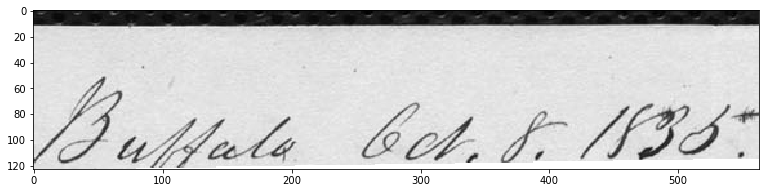

Prediction: B utfato bot. 3. 133.
Label: Buffalo Oct. 8. 1835.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887085_87130400_0_0.png
-----------------------------------------------------------------------------


In [16]:
for i in range(min(len(newstuff), 20)):
    lab = newstuff.iloc[i]["label"]
    wor = newstuff.iloc[i]["word"]
    img = newstuff.iloc[i]["filename"]
    img = img.replace("/home/hans3724", "C:/Users/danny/Repos")
    img = img.replace(".0", "")
    try:
        plt.imshow(np.asarray(Image.open(img)), cmap="gray")
        plt.show()
    except:
        pass
    print("Prediction: {1}\nLabel: {0}\nFilename: {2}".format(lab, wor, img))
    print("-----------------------------------------------------------------------------")

# After training for a while

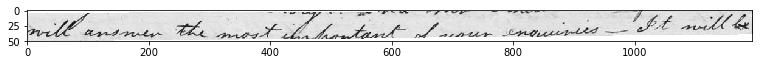

Prediction: will answer the most ihrpontant of your enquiries - It will he
Label: will answer the most important of your enquiries _ It will be
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13890301_87215819_0_6.png
-----------------------------------------------------------------------------


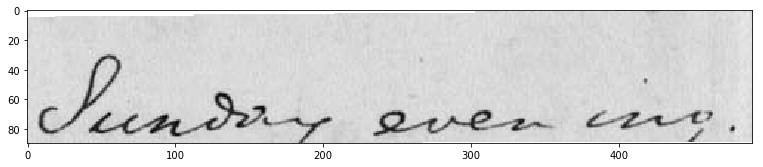

Prediction: Sunday even ing.
Label: Sunday evening.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887996_87217100_0_0.png
-----------------------------------------------------------------------------


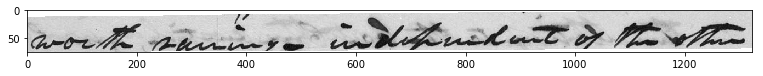

Prediction: wort saning inlepurdert of th oth
Label: worth saving - independant of the other
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13886769_87217652_1_0.png
-----------------------------------------------------------------------------


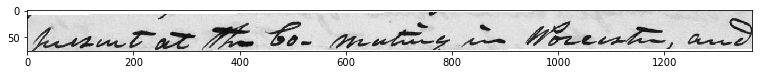

Prediction: peesent at the bo- muting in Moreeste, and
Label: present at the Co. meeting in Worcester, and
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13886769_87217652_2_0.png
-----------------------------------------------------------------------------


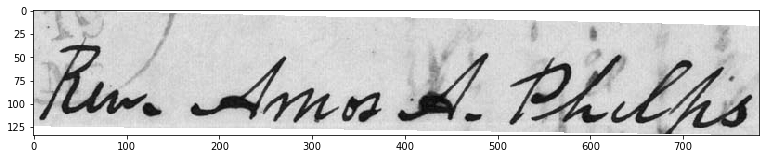

Prediction: Rww Mnos . thels
Label: Rev. Amos A Philps
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13886769_87217652_3_0.png
-----------------------------------------------------------------------------


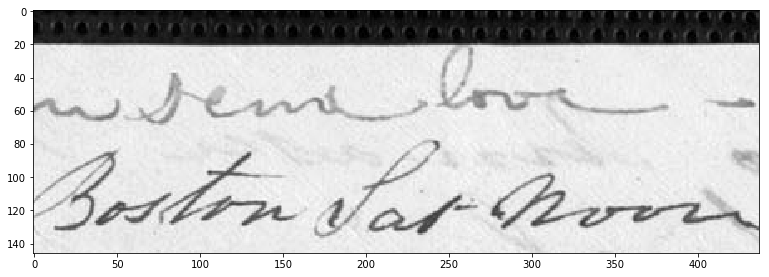

Prediction: oston Sat noon
Label: Boston Sat noon
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889121_87217869_0_0.png
-----------------------------------------------------------------------------


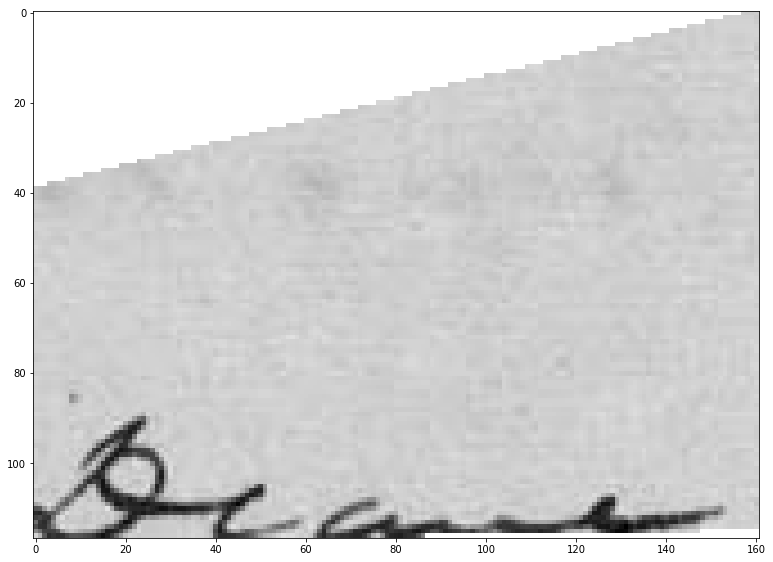

Prediction: be
Label: Dean
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13886928_87218086_0_0.png
-----------------------------------------------------------------------------


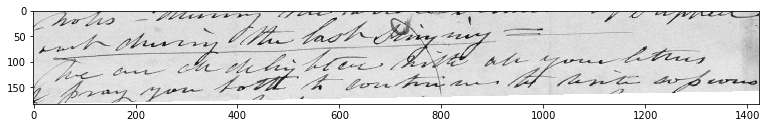

Prediction:           y onh rseou
Label: & pray you both to continue to write so pious
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889663_87218687_3_0.png
-----------------------------------------------------------------------------


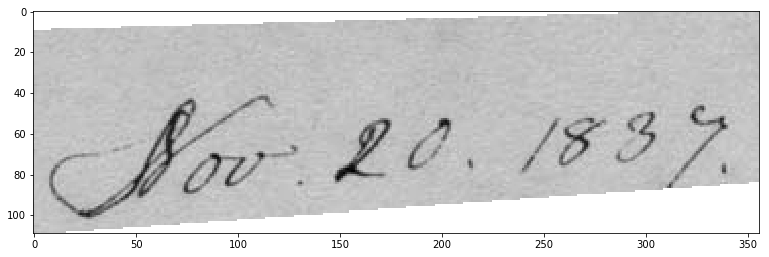

Prediction: 8oo. 20. 1837.
Label: Nov. 20 1839
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887730_87218801_0_0.png
-----------------------------------------------------------------------------


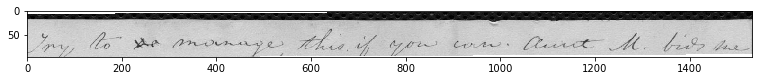

Prediction: Irry to te manage, this if you can. Anct M. bids me
Label: Try to manage this if you can. Aunt M. bids she
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887730_87218801_1_0.png
-----------------------------------------------------------------------------


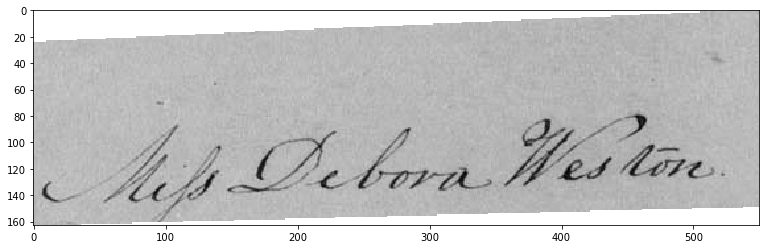

Prediction: eifs Sebora Weston
Label: Mrs Debora Weston
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13887730_87218801_3_0.png
-----------------------------------------------------------------------------


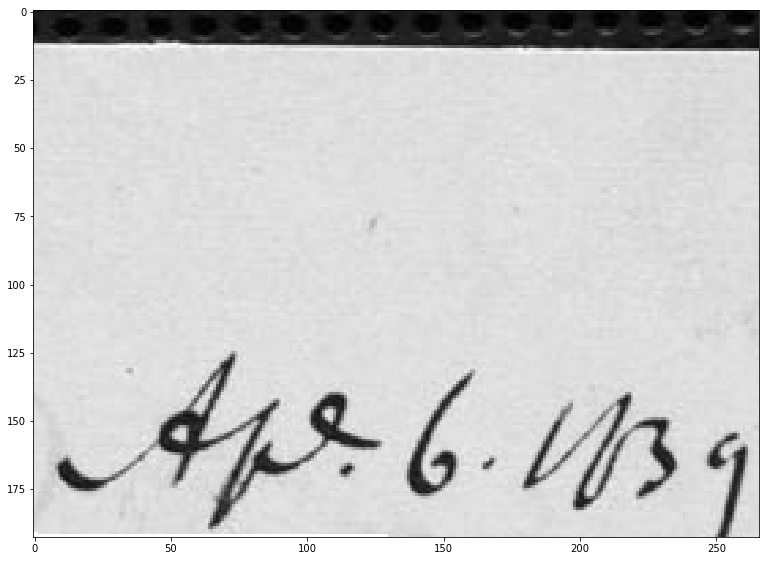

Prediction: Apeb1s
Label: April 6 1639
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13898962_87218824_0_0.png
-----------------------------------------------------------------------------


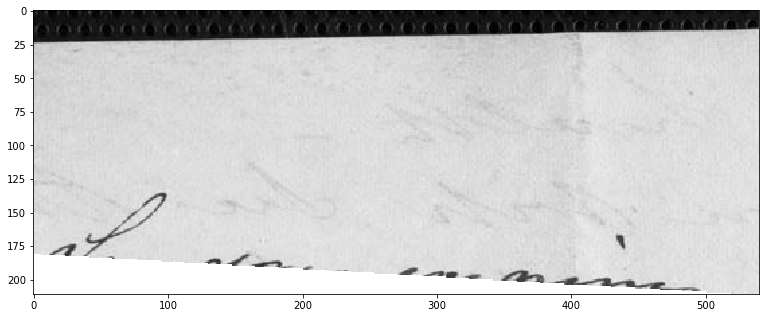

Prediction: afae
Label: Sunday evening
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889800_87219108_0_0.png
-----------------------------------------------------------------------------


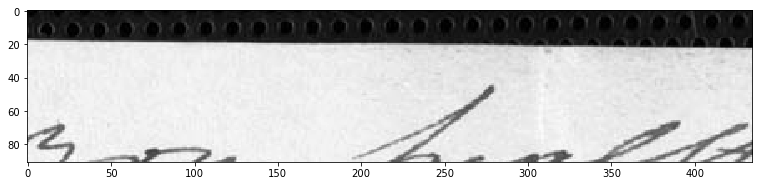

Prediction: you heall
Label: your health.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889800_87219108_1_0.png
-----------------------------------------------------------------------------


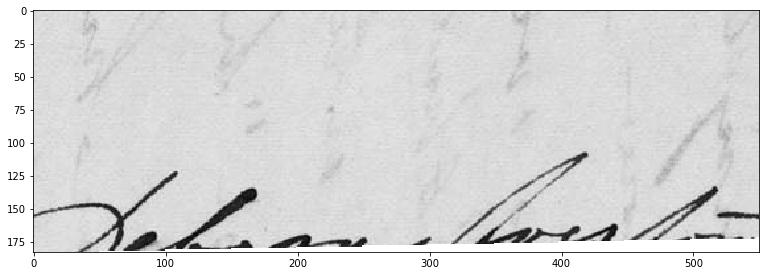

Prediction: DeeaMoes
Label: Deborah Weston
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889800_87219108_3_0.png
-----------------------------------------------------------------------------


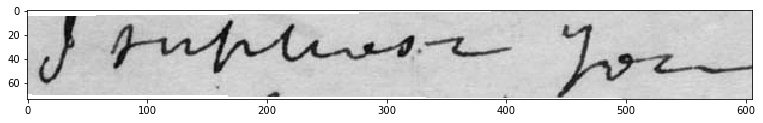

Prediction: I tutesn you
Label: I suppose your
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889561_87219738_0_0.png
-----------------------------------------------------------------------------


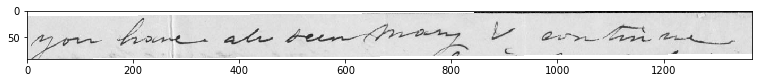

Prediction: you havee ale seenmang  continne
Label: you have all seen Mary & continue
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13889781_87219879_1_0.png
-----------------------------------------------------------------------------


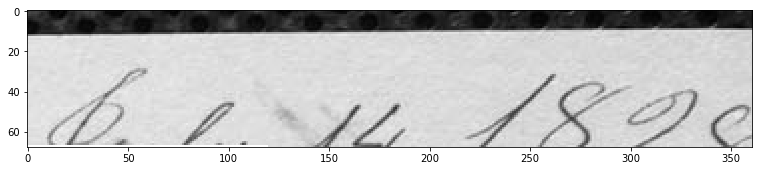

Prediction: b.l4 13ge
Label: July 14 1828
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13890249_87220015_0_0.png
-----------------------------------------------------------------------------


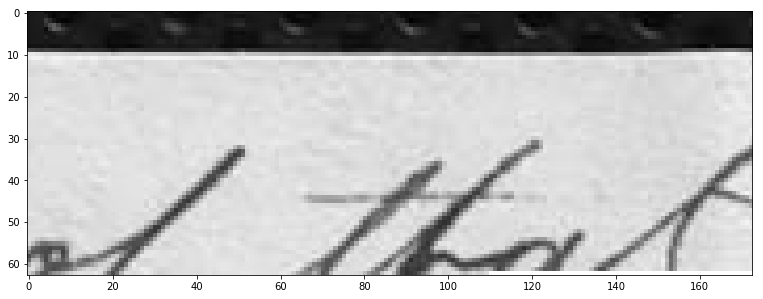

Prediction: af that
Label: of that
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13890249_87220015_1_0.png
-----------------------------------------------------------------------------


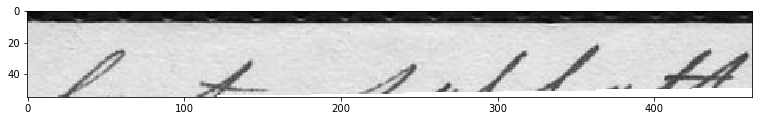

Prediction: t satlath
Label: last sabbath
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13890249_87220015_2_0.png
-----------------------------------------------------------------------------


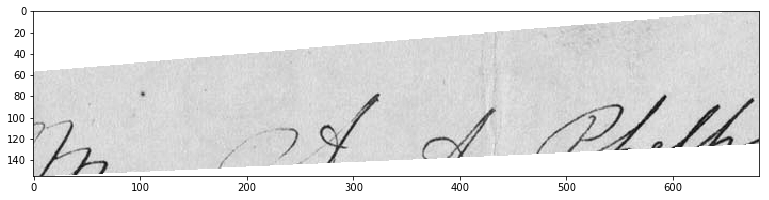

Prediction: f f Pheth
Label: Mr. A. A. Phelps
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13890249_87220015_3_0.png
-----------------------------------------------------------------------------


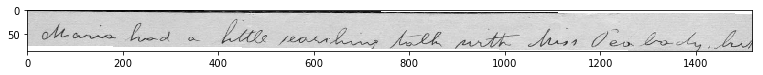

Prediction: Mana had a hillle rearching palk uith Mhiss seabady, hef
Label: Maria had a little refreshing talk with Miss Peabody, but
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891673_87220165_1_0.png
-----------------------------------------------------------------------------


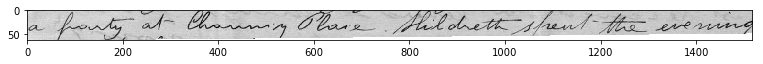

Prediction: a party, at Chauncy Plare. Hil dreth spent the evening
Label: a party at Channing Place. Hildreth spent the evening
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891673_87220165_2_0.png
-----------------------------------------------------------------------------


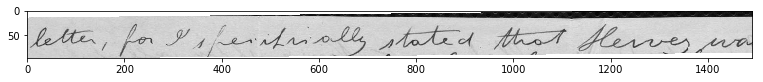

Prediction: letter, for I specitically stated that Hervegwa
Label: letter, for I specifically stated that Harvey was
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891673_87220165_3_0.png
-----------------------------------------------------------------------------


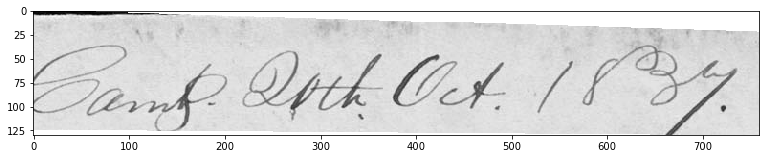

Prediction: Pant. Poth Oet.1 83.
Label: Camb. 20th Oct. 1837
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891489_87220442_0_0.png
-----------------------------------------------------------------------------


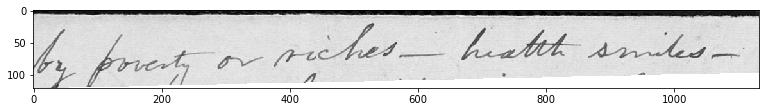

Prediction: by porerty or riches hiatth smiles
Label: by poverty or riches - health smiles -
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891489_87220442_1_0.png
-----------------------------------------------------------------------------


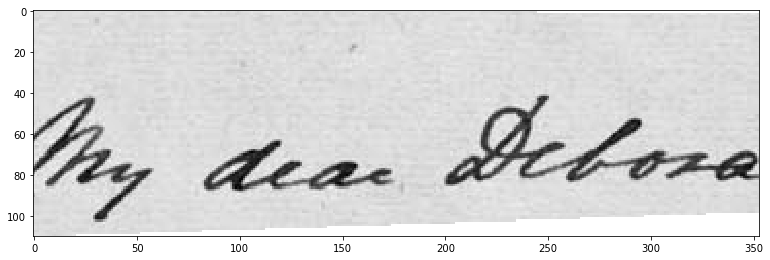

Prediction: My dear Debora
Label: My dear Debora
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891489_87220442_2_0.png
-----------------------------------------------------------------------------


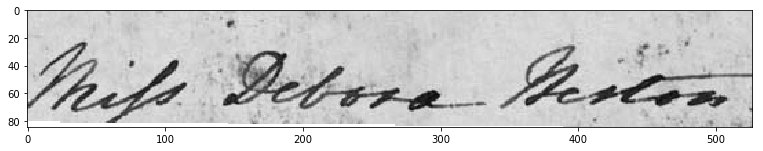

Prediction: Wiss Debora Weston
Label: Miss Debora Weston
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891489_87220442_3_0.png
-----------------------------------------------------------------------------


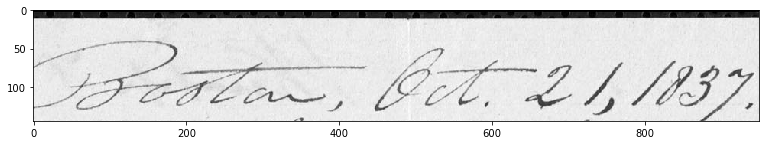

Prediction: A Ostar, Bt.D2 1 183y
Label: Boston, Oct. 21, 1837.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891489_87220442_4_0.png
-----------------------------------------------------------------------------


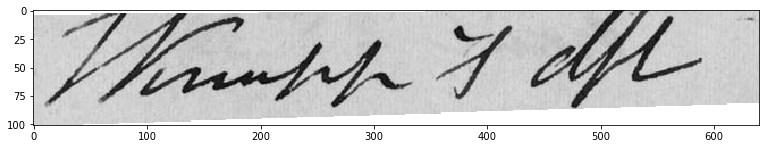

Prediction: Pnuppr 'I dt
Label: Knapp F dft
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13891489_87220442_5_0.png
-----------------------------------------------------------------------------


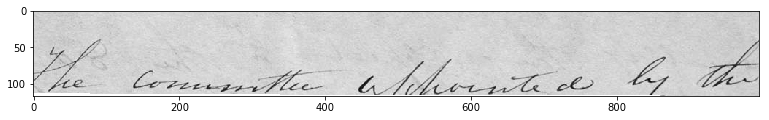

Prediction: Hhe conunmttee alhornte by the
Label: The committee appointed by the
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13888860_87220759_0_0.png
-----------------------------------------------------------------------------


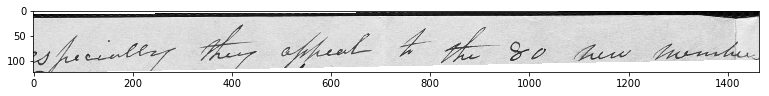

Prediction: especially they appeal to the 8o hewe member
Label: especially they appeal to the 80 new members.
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13888860_87220759_1_0.png
-----------------------------------------------------------------------------


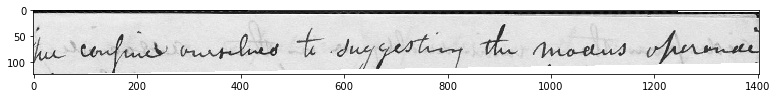

Prediction: ee conginel orselves to suggesting the moans operonae
Label: we confine ourselves to suggesting the modus operandi
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13888860_87220759_2_0.png
-----------------------------------------------------------------------------


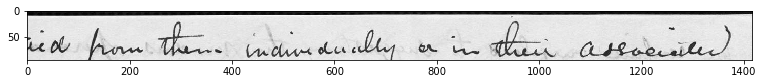

Prediction: ied from then indivedually or in their aseocicte
Label: aid from them individually or in their assoicated
Filename: C:/Users/danny/Repos/text_recognition/data/ASM/Images/13888860_87220759_3_0.png
-----------------------------------------------------------------------------


In [8]:
for i in range(len(newstuff)):
    lab = newstuff.iloc[i]["label"]
    wor = newstuff.iloc[i]["word"]
    img = newstuff.iloc[i]["filename"]
    img = img.replace("/home/hans3724", "C:/Users/danny/Repos")
    img = img.replace(".0", "")
    try:
        plt.imshow(np.asarray(Image.open(img)), cmap="gray")
        plt.show()
    except:
        pass
    print("Prediction: {1}\nLabel: {0}\nFilename: {2}".format(lab, wor, img))
    print("-----------------------------------------------------------------------------")